# Study 3: Survey Data Preprocessing

In [239]:
#Loading necessary packages

import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

### Steps

1. Load the Parents Surveys from the different schools and merge them
2. Load the childrens' surveys from the different schools and merge them 
3. Preprocessing survey data
4. Transforming Merge Datagrame from Wide Format to Long Format for Analysis
5. Running some Descriptive Analysis and Visualizations of the Survey Data

## 1. Loading Parents Survey Data

### 1.1 GSR School Haarlem

In [110]:
#Loading the File
gsr_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR_parents.csv')

In [111]:
#Creating a column with full name
gsr_parents["Name"] = gsr_parents["Name_child"] + " " + gsr_parents["Lastname_child"]

In [112]:
#Dropping parents that filled in the form multiple times
gsr_parents.dropna(subset=['Name'], inplace=True)
gsr_parents.drop_duplicates(subset=['Name'], inplace=True)
len(gsr_parents)

112

In [114]:
#Check if these are all unique items
len(gsr_parents["Name"].unique())

112

In [115]:
#Consent overview for the GSR
gsr_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             98
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                            12
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:     1
{"ImportId":"QID3"}                                                                                       1
Name: count, dtype: int64

### 1.2. Wolfert Rotterdam

In [116]:
#Loading the file
wolfert_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/wolfert_parents.csv')

In [117]:
#Creating a column with full name
wolfert_parents["Name"] = wolfert_parents["Name_child"] + " " + wolfert_parents["Lastname_child"]

In [120]:
#Dropping parents that filled in the form multiple times
wolfert_parents.dropna(subset=['Name'], inplace=True)
print(len(wolfert_parents))
wolfert_parents.drop_duplicates(subset=['Name'], inplace=True)
len(wolfert_parents)

#Check
print(len(wolfert_parents["Name"].unique()))

56
56


In [121]:
#Consent overview for the Wolfert
wolfert_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             47
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                             7
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:     1
{"ImportId":"QID3"}                                                                                       1
Name: count, dtype: int64

### 1.3. Almere

In [125]:
#Loading the File
almere_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Parential Consent Social Movez Almere_October 23, 2024_06.37.csv')

In [126]:
# #Creating a column with full name
almere_parents["Name"] = almere_parents["Name_child"] + " " + almere_parents["Lastname_child"]

In [127]:
almere_parents.dropna(subset=['Name'], inplace=True)
print(len(almere_parents))
almere_parents.drop_duplicates(subset=['Name'], inplace=True)
len(almere_parents)

158


149

In [128]:
#Consent overview for Utrecht
almere_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             133
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                             14
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:      1
{"ImportId":"QID3"}                                                                                        1
Name: count, dtype: int64

### 1.4. Utrecht Bilthoven

In [129]:
#Loading the File
utrecht_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/utrecht_parents.csv')

In [130]:
# #Creating a column with full name
utrecht_parents["Name"] = utrecht_parents["Name_child"] + " " + utrecht_parents["Lastname_child"]

In [131]:
utrecht_parents.dropna(subset=['Name'], inplace=True)
print(len(utrecht_parents))
utrecht_parents.drop_duplicates(subset=['Name'], inplace=True)
len(utrecht_parents)

149


136

In [132]:
#Consent overview for Utrecht
utrecht_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             126
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                              8
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:      1
{"ImportId":"QID3"}                                                                                        1
Name: count, dtype: int64

In [21]:
#message_jonas.to_csv('jonas_messages.csv', encoding='utf-8', index=False)

## 2. Loading Children Survey Data

### 2.1. GSR Surveys

In [135]:
#Loading all data from the GSR for the different waves

gsr_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T1.csv')
gsr_t15 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T1.5n.csv')
gsr_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T2.csv')
gsr_t2_post = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR post T2.csv')

gsr_t15 = gsr_t15.tail(-2)
gsr_t1 = gsr_t1.tail(-2)
gsr_t2 = gsr_t2.tail(-2)
gsr_t2_post = gsr_t2_post.tail(-2)

print(len(gsr_t1), len(gsr_t15), len(gsr_t2), len(gsr_t2_post))

101 26 51 4


In [136]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

gsr_t1.dropna(subset=['School_mail'], inplace=True)
gsr_t15.dropna(subset=['School_mail'], inplace=True)
gsr_t2.dropna(subset=['School_mail'], inplace=True)
gsr_t2_post.dropna(subset=['School_mail'], inplace=True)

gsr_t1 = gsr_t1.drop(gsr_t1[gsr_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
gsr_t15 = gsr_t15.drop(gsr_t15[gsr_t15['School_mail'] == 'j.schlicht@t-online.de'].index)
gsr_t2 = gsr_t2.drop(gsr_t2[gsr_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

gsr_t1 = gsr_t1.rename(columns={"Random ID": "Movez_code"})

print(len(gsr_t1), len(gsr_t15), len(gsr_t2), len(gsr_t2_post))

87 20 47 4


In [137]:
#Lowercasing the school_mail column for correct matching

gsr_t1["School_mail"] = gsr_t1["School_mail"].astype(str).apply(str.lower)
gsr_t15["School_mail"] = gsr_t15["School_mail"].astype(str).apply(str.lower)
gsr_t2["School_mail"] = gsr_t2["School_mail"].astype(str).apply(str.lower)
gsr_t2_post["School_mail"] = gsr_t2_post["School_mail"].astype(str).apply(str.lower)

In [140]:
# Function to extract the Identifiers
def extract_mail_and_code(df):
    return df["School_mail"].tolist(), df[["School_mail", "Movez_code"]]

school_mails_t1, school_df_t1 = extract_mail_and_code(gsr_t1)
school_mails_t15, school_df_t15 = extract_mail_and_code(gsr_t15)
school_mails_t2, school_df_t2 = extract_mail_and_code(gsr_t2)
school_mails_t2_post, school_df_t2_post = extract_mail_and_code(gsr_t2_post)


In [143]:
# Convert to sets for comparison
set_t1 = set(school_mails_t1)
set_t15 = set(school_mails_t15)
set_t2 = set(school_mails_t2)
set_t2_post = set(school_mails_t2_post)

# Overlaps
print("The overlap between T1 and T2 is:", len(set_t1 & set_t2))
print("The overlap between T1 and T1.5 is:", len(set_t1 & set_t15))
print("The overlap between T1 and T2_post is:", len(set_t1 & set_t2_post))
print("The overlap between T1, T15 and T2 is:", len(set_t1 & set_t15 & set_t2))

# Differences
print("The difference between T1 and T2 is:", len(set_t1 - set_t2))

The overlap between T1 and T2 is: 43
The overlap between T1 and T1.5 is: 18
The overlap between T1 and T2_post is: 4
The overlap between T1, T15 and T2 is: 15
The difference between T1 and T2 is: 37


In [24]:
#Mails that are not matched yet
no_overlap_gsr

['l112829@gmail.nl', 'l112968@gmail.com', 'l11298@gmail.com', 'l112990@gsr.nl']

In [144]:
# Replacing the faulty mails within the no_overlap file

gsr_t1 = gsr_t1.replace({'School_mail': {"l112829@gmail.nl": "l112829@gsr.nl", "l11298@gmail.com": "l11298@gsr.nl","l112968@gmail.com": "l112968@gsr.nl"}})

gsr_t2 = gsr_t2.replace({'School_mail': {"l112829@gmail.nl": "l112829@gsr.nl", "l11298@gmail.com": "l11298@gsr.nl","l112968@gmail.com": "l112968@gsr.nl"}})

### 1.1.2. Merging GSR Waves

In [240]:
#Lets merge the GSR dataframes together
gsr1 = gsr_t1.merge(gsr_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
gsr1['School_mail'] = gsr1['School_mail'].combine_first(gsr1['School_mail'])
gsr1['Movez_code'] = gsr1['Movez_code_left'].combine_first(gsr1['Movez_code_right'])
gsr1 = gsr1.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

#Adding school name handle to identify the school later on

gsr1["school"] = "gsr"

len(gsr1)

90

## 2.2. Wolfert Surveys

In [241]:
#Loading all data from the Wolfert

wolfert_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Wolfert T15.csv')
wolfert_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Wolfert T2.csv')

wolfert_t1 = wolfert_t1.tail(-2)
wolfert_t2 = wolfert_t2.tail(-2)


print(len(wolfert_t1), len(wolfert_t2))

36 27


In [242]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

wolfert_t1.dropna(subset=['School_mail'], inplace=True)
wolfert_t2.dropna(subset=['School_mail'], inplace=True)

wolfert_t1 = wolfert_t1.drop(wolfert_t1[wolfert_t1['School_mail'] == "j.schlicht@t-online.de"].index) #Filtering myself out
wolfert_t1 = wolfert_t1.rename(columns = {"Random ID": "Movez_code"})

print(len(wolfert_t1), len(wolfert_t2))

33 23


In [243]:
#Lowercasing the school_mail column for correct matching

wolfert_t1["School_mail"] = wolfert_t1["School_mail"].astype(str).apply(str.lower)
wolfert_t2["School_mail"] = wolfert_t2["School_mail"].astype(str).apply(str.lower)

In [244]:
#Isolating the Identifiers School_mail and code

school_mails_wolfertt1 = list(wolfert_t1["School_mail"])
school_mails_wolfertt2 = list(wolfert_t2["School_mail"])

code_wolfertt1 = list(wolfert_t1["Movez_code"])
code_wolfertt2 = list(wolfert_t2["Movez_code"])


In [245]:
# Extract identifiers from each wave
wolfert_t1_mails = set(wolfert_t1["School_mail"].dropna())
wolfert_t2_mails = set(wolfert_t2["School_mail"].dropna())

wolfert_t1_codes = wolfert_t1["Movez_code"].tolist()
wolfert_t2_codes = wolfert_t2["Movez_code"].tolist()

# Identify overlap and difference
overlap_wolfert = wolfert_t1_mails & wolfert_t2_mails
no_overlap_wolfert = wolfert_t2_mails - wolfert_t1_mails

# Output
print(f"Number of overlapping School_mail entries: {len(overlap_wolfert)}")
print(f"Number of School_mail entries in T2 not in T1: {len(no_overlap_wolfert)}")


Number of overlapping School_mail entries: 21
Number of School_mail entries in T2 not in T1: 2


In [246]:
no_overlap_wolfert

{'134719@wolfert.nl', '134723@wolfert.nl'}

### Merging Wolfert Waves



In [247]:
#Lets merge the dataframes together
# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
wolfert = wolfert_t1.merge(wolfert_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
wolfert['School_mail'] = wolfert['School_mail'].combine_first(wolfert['School_mail'])
wolfert['Movez_code'] = wolfert['Movez_code_left'].combine_first(wolfert['Movez_code_right'])
wolfert = wolfert.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

len(wolfert)

35

In [249]:
#Renaming column names

rename_map = {
    'Mess_pref_cog_1': 'Mes_pref_cog_1',
    'Mess_pref_cog_2': 'Mes_pref_cog_2',
    'Mess_eff_cog_1': 'Mes_eff_cog_1',
    'Mess_eff_cog_2': 'Mes_eff_cog_2',
    'Mess_pref_subj_1': 'Mes_pref_subj_1',
    'Mess_pref_subj_2': 'Mes_pref_subj_2',
    'Mess_eff_subj_1': 'Mes_eff_subj_1',
    'Mess_eff_subj_2': 'Mes_eff_subj_2',
    'Mess_pref_aquire_1': 'Mes_pref_acquire_1',
    'Mess_pref_aquire_2': 'Mes_pref_acquire_2',
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2'
}

wolfert = wolfert.rename(columns=rename_map)

# Lets add the school handle once more
wolfert["school"] = "wolfert"

## 2.3. Utrecht Surveys

In [250]:
#Loading all data from Utrecht

utrecht_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Utrecht T1.csv')
utrecht_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Utrecht T2.csv')

utrecht_t1 = utrecht_t1.tail(-2)
utrecht_t2 = utrecht_t2.tail(-2)

utrecht_t1 = utrecht_t1.rename(columns={"Random ID": "Movez_code"})


print(len(utrecht_t1), len(utrecht_t2))

113 99


In [251]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

utrecht_t1.dropna(subset=['School_mail'], inplace=True)
utrecht_t2.dropna(subset=['School_mail'], inplace=True)

#Filtering myself out of the dataset
utrecht_t1 = utrecht_t1.drop(utrecht_t1[utrecht_t1['School_mail'] == 'schlicht@essb.eur.nl'].index)
utrecht_t1 = utrecht_t1.drop(utrecht_t1[utrecht_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
utrecht_t2 = utrecht_t2.drop(utrecht_t2[utrecht_t2['School_mail'] == 'schlicht@essb.eur.nl'].index)
utrecht_t2 = utrecht_t2.drop(utrecht_t2[utrecht_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

print(len(utrecht_t1), len(utrecht_t2))

104 82


In [252]:
#Lowercasing the school_mail column for correct matching

utrecht_t1["School_mail"] = utrecht_t1["School_mail"].astype(str).apply(str.lower)
utrecht_t2["School_mail"] = utrecht_t2["School_mail"].astype(str).apply(str.lower)

In [253]:
# Extract identifiers and subset DataFrames
mails_t1 = set(utrecht_t1["School_mail"].dropna())
mails_t2 = set(utrecht_t2["School_mail"].dropna())

codes_t1 = set(utrecht_t1["Movez_code"].dropna())
codes_t2 = set(utrecht_t2["Movez_code"].dropna())

df_t1 = utrecht_t1[["School_mail", "Movez_code"]]
df_t2 = utrecht_t2[["School_mail", "Movez_code"]]

# Compute overlaps and differences
overlap_mails = mails_t1 & mails_t2
overlap_codes = codes_t1 & codes_t2
new_mails_in_t2 = mails_t2 - mails_t1

# Output results
print(f"Overlap in School_mail between T1 and T2: {len(overlap_mails)}")
print(f"Overlap in Movez_code between T1 and T2: {len(overlap_codes)}")
print(f"New School_mail entries in T2 not in T1: {len(new_mails_in_t2)}")


Overlap in School_mail between T1 and T2: 74
Overlap in Movez_code between T1 and T2: 77
New School_mail entries in T2 not in T1: 6


In [254]:
new_mails_in_t2

{'e.nierop@wpkeesboeke.nl',
 'j.maat2@wpkeesboeke.ml',
 'k.kars@wpkeesboeke.nl',
 'k.vanroest@wpkeesboeke.nl',
 'l.zweedijk@wpkeesboek.nl',
 'sam@wpkeesboeke.nl'}

### Merging Utrecht Waves

In [255]:
#Lets merge the dataframes together

# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
utrecht = utrecht_t1.merge(utrecht_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
utrecht['School_mail'] = utrecht['School_mail'].combine_first(utrecht['School_mail'])
utrecht['Movez_code'] = utrecht['Movez_code_left'].combine_first(utrecht['Movez_code_right'])
utrecht = utrecht.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

len(utrecht)

114

In [257]:
# Renaming some columns
rename_map = {
    col: col.replace("Mess_", "Mes_").replace("aquire", "acquire")
    for col in utrecht.columns
    if col.startswith("Mess_") or "aquire" in col
}

# Manual corrections for inconsistent names
rename_map.update({
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2'
})

# Apply renaming
utrecht = utrecht.rename(columns=rename_map)

# Lets add the school handle

utrecht["school"] = "utrecht"

##  2.4. Almere Surveys

In [258]:
#Loading all data from Almere
almere_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/almere_t1.csv')
almere_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/almere_t2.csv')

almere_t1 = almere_t1.tail(-2)
almere_t2 = almere_t2.tail(-2)
almere_t1 = almere_t1.rename(columns={"Random ID": "Movez_code"})

print(len(almere_t1), len(almere_t2))

84 81


In [259]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

almere_t1.dropna(subset=['School_mail'], inplace=True)
almere_t2.dropna(subset=['School_mail'], inplace=True)

#Filtering myself out
almere_t1 = almere_t1.drop(almere_t1[almere_t1['School_mail'] == 'schlicht@essb.eur.nl'].index)
almere_t1 = almere_t1.drop(almere_t1[almere_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
almere_t2 = almere_t2.drop(almere_t2[almere_t2['School_mail'] == 'schlicht@essb.eur.nl'].index)
almere_t2 = almere_t2.drop(almere_t2[almere_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

print(len(almere_t1), len(almere_t2))

63 76


In [260]:
#Lowercasing the school_mail column for correct matching
almere_t1["School_mail"] = almere_t1["School_mail"].astype(str).apply(str.lower)
almere_t2["School_mail"] = almere_t2["School_mail"].astype(str).apply(str.lower)

#Ajust a faulty mail
almere_t1['School_mail'] = almere_t1['School_mail'].replace(['134520@student.hetbakene.nl'],['134520@student.hetbaken.nl'])
almere_t2['School_mail'] = almere_t2['School_mail'].replace(['134612@student.htbaken.nl'],['134612@student.hetbaken.nl'])

In [261]:
# Convert School_mail columns to sets (removing missing values)
mails_t1 = set(almere_t1["School_mail"].dropna())
mails_t2 = set(almere_t2["School_mail"].dropna())

# Optional: keep filtered DataFrames if needed later
df_t1 = almere_t1[["School_mail"]]
df_t2 = almere_t2[["School_mail"]]

# Calculate overlaps and differences
overlap_mails = mails_t1 & mails_t2
new_mails_in_t2 = mails_t2 - mails_t1

# Print results
print(f"Overlap in School_mail between T1 and T2: {len(overlap_mails)}")
print(f"New School_mail entries in T2 not in T1: {len(new_mails_in_t2)}")


Overlap in School_mail between T1 and T2: 55
New School_mail entries in T2 not in T1: 19


In [262]:
new_mails_in_t2

{'131953@student.hetbaken.nl',
 '132551@student.hetbaken.nl',
 '132762@student.hetbaken.nl',
 '133222@student.hetbaken.nl',
 '133544@student.hetbaken.nl',
 '133645@student.hetbaken.nl',
 '133762@student.hetbaken.nl',
 '133805@student.hetbaken.nl',
 '134167@student.hetbaken.nl',
 '134338@student.hetbaken.nl',
 '134518@student.hetbaken.nl',
 '134520@student.hetbakene.nl',
 '134589@student.hetbaken.nl',
 '134637@student.hetbaken.nl',
 '134767@student.hetbaken.nl',
 '13489@student.hetbaken.nl',
 'hetzegtvuleengeldigealsikhettyp@gmail.com',
 'p.willemse@hetbaken.nl',
 'weetikniet@gmail.com'}

### Merging Almere Waves

In [263]:
#Lets merge the dataframes together

# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
almere = almere_t1.merge(almere_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
almere['School_mail'] = almere['School_mail'].combine_first(almere['School_mail'])
almere = almere.drop(columns=["StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

print(len(almere))
almere.head()

84


,StartDate_left,EndDate_left,Status_left,IPAddress,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel_left,UserLanguage_left,School_mail,Movez_code,Mes_pref_WPS_1,Mes_pref_WPS_2,Mes_eff_WPS_1,Mes_eff_WPS_2,Mes_pref_WPS_1.1,Mes_pref_WPS_2.1,Mes_pref_want_1,Mes_pref_want_2,Mes_eff_want_1,Mes_eff_want_2,Mes_pref_want_1.1,Mes_pref_want_2.1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Mes_pref_big_1.1,Mes_pref_big_2.1,Mes_pref_intensity_1,Mes_pref_intensity_2,Mes_eff_intensity_1,Mes_eff_intensity_2,Mes_pref_intensity_1.1,Mes_pref_intensity_2.1,Mes_pref_drive_1,Mes_pref_drive_2,Mes_eff_drive_1,Mes_eff_drive_2,Mes_pref_drive_1.1,Mes_pref_drive_2.1,Mes_pref_convers_1,...,Progress_right,Mes_pref_allure_1,Mes_pref_allure_2,Mes_eff_allure_1,Mes_eff_allure_2,Mes_pref_allure_1.1,Mes_pref_allure_2.1,Mes_pref_cog_1,Mes_pref_cog_2,Mes_eff_cog_1,Mes_eff_cog_2,Mes_pref_cog_1.1,Mes_pref_cog_2.1,Mes_pref_negemo_1,Mes_pref_negemo_2,Mes_eff_negemo_1,Mes_eff_negemo_2,Mes_pref_negemo_1.1,Mes_pref_negemo_2.1,Mes_pref_negtone_1,Mes_pref_negtone_2,Mes_eff_negtone_1,Mes_eff_negtone_2,Mes_pref_negtone_1.1,Mes_pref_negtone_2.1,Mes_pref_subj_1,Mes_pref_subj_2,Mes_eff_subj_1,Mes_eff_subj_2,Mes_pref_subj_1.1,Mes_pref_subj_2.1,Mes_pref_posemo_1,Mes_pref_posemo_2,Mes_eff_posemo_1,Mes_eff_posemo_2,Mes_pref_posemo_1.1,Mes_pref_posemo_2.1,Q115_1,Q115_2,Q115_3,Q116_1,Q116_2,Q116_3,Q118_1,Q118_2,Q119_1,Q119_2,Q119_3,Q119_4,Q1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131953@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,On,Off,Off,On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,6,6,6,6,6,6,6,6,6,6,6,6,NaN
1,2024-09-25 05:56:47,2024-09-25 06:08:16,0,145.102.241.198,100,688,1,2024-09-25 06:08:16,R_8GNUedvldiKh4hc,NaN,NaN,NaN,NaN,52.3664,4.8496,anonymous,NL,132251@student.hetbaken.nl,4347583,NaN,NaN,NaN,NaN,Off,On,On,Off,2,3,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,Off,On,2,3,NaN,NaN,On,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-25 04:02:26,2024-09-25 04:09:35,0,145.102.241.198,100,429,1,2024-09-25 04:09:36,R_2WUtIOpwLJVKdNb,NaN,NaN,NaN,NaN,52.3664,4.8496,anonymous,NL,132320@student.hetbaken.nl,1234567,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,Off,On,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132551@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100,NaN,NaN,NaN,NaN,On,Off,Off,On,1,4,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,Off,On,3,4,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,Off,On,6,6,3,5,6,6,1,6,5,3,4,4,ja was leuk een beetje veel herhaling maar dat...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132762@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
# Define all renaming in a clean block
rename_map = {
    'Mess_pref_cog_1': 'Mes_pref_cog_1',
    'Mess_pref_cog_2': 'Mes_pref_cog_2',
    'Mess_eff_cog_1': 'Mes_eff_cog_1',
    'Mess_eff_cog_2': 'Mes_eff_cog_2',
    'Mess_pref_subj_1': 'Mes_pref_subj_1',
    'Mess_pref_subj_2': 'Mes_pref_subj_2',
    'Mess_eff_subj_1': 'Mes_eff_subj_1',
    'Mess_eff_subj_2': 'Mes_eff_subj_2',
    'Mess_pref_convers_1': 'Mes_pref_convers_1',
    'Mess_pref_convers_2': 'Mes_pref_convers_2',
    'Mess_pref_postone_1': 'Mes_pref_postone_1',
    'Mess_pref_postone_2': 'Mes_pref_postone_2',
    'Mess_pref_aquire_1': 'Mes_pref_acquire_1',
    'Mess_pref_aquire_2': 'Mes_pref_acquire_2',
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2',
    'Q115_1': 'self_eff1',
    'Q115_2': 'self_eff2',
    'Q115_3': 'self_eff3',
    'Q116_1': 'Perc_sev1',
    'Q116_2': 'Perc_sev2',
    'Q116_3': 'Perc_sev3',
    'Q118_1': 'Res_Part1',
    'Q118_2': 'Res_Part2',
    'Q119_1': 'Aut_eval1',
    'Q119_2': 'Aut_eval2',
    'Q119_3': 'Aut_eval3',
    'Q119_4': 'Aut_eval4',
    'Q1': 'Open field',
    'Q466': 'Sharing_behavior',
    'Q470_1': 'Sharing_context1',
    'Q470_2': 'Sharing_context2',
    'Q470_3': 'Sharing_context3',
    'Q472_1': 'Self_eff1',
    'Q472_2': 'Self_eff2',
    'Q471_1': 'Perc_control1',
    'Q471_2': 'Perc_control2',
    'Q471_3': 'Perc_control3',
}

# Apply the renaming
almere = almere.rename(columns=rename_map)

## Lets add the school handle

almere["school"] = "almere"

In [266]:
#There are some faulty column names in this dataset, we will adjust them

# Replace string 'NaN' with actual np.nan
almere = almere.replace('NaN', np.nan)

# List of base column names (without ".1")
base_columns = [
    'Mes_pref_WPS', 'Mes_pref_want', 'Mes_pref_big', 'Mes_pref_intensity',
    'Mes_pref_drive', 'Mes_pref_convers', 'Mes_pref_postone',
    'Mes_pref_social', 'Mes_pref_allure', 'Mes_pref_negemo',
    'Mes_pref_negtone', 'Mes_pref_subj', 'Mes_pref_posemo'
]

# Fill NaNs in each base column with corresponding ".1" column
for col in base_columns:
    almere[f"{col}_1"] = almere[f"{col}_1"].fillna(almere.get(f"{col}_1.1"))
    almere[f"{col}_2"] = almere[f"{col}_2"].fillna(almere.get(f"{col}_2.1"))


In [267]:
almere = almere.drop(columns=['Mes_pref_WPS_1.1','Mes_pref_WPS_2.1', 'Mes_pref_want_1.1',  'Mes_pref_want_2.1', 'Mes_pref_big_1.1', 'Mes_pref_big_2.1', 'Mes_pref_intensity_1.1', 'Mes_pref_intensity_2.1', 'Mes_pref_drive_1.1', 'Mes_pref_drive_2.1', 'Mes_pref_convers_1.1', 'Mes_pref_convers_2.1','Mes_pref_postone_1.1', 'Mes_pref_postone_2.1', 'Mes_pref_social_1.1','Mes_pref_social_2.1', 'Mes_pref_allure_1.1', 'Mes_pref_allure_2.1', 'Mes_pref_cog_1.1', 'Mes_pref_cog_2.1', 'Mes_pref_negemo_1.1','Mes_pref_negemo_2.1','Mes_pref_negtone_1.1', 'Mes_pref_negtone_2.1', 'Mes_pref_subj_1.1', 'Mes_pref_subj_2.1', 'Mes_pref_posemo_1.1', 'Mes_pref_posemo_2.1'])

In [268]:
# lets save our unique Identifiers per School

random_id_utrecht = list(utrecht["Movez_code"])
random_id_gsr = list(gsr1["Movez_code"])
random_id_wolfert = list(wolfert["Movez_code"])
random_id_almere = list(almere["Movez_code"])

In [69]:
#almere.to_csv("C:/Users/Jonas/Almere_data.csv")

### 2.5 Merging All Children Surveys Together

In [269]:
# Reset the index for each DataFrame before concatenation
gsr1 = gsr1.reset_index(drop=True)
wolfert = wolfert.reset_index(drop=True)
utrecht = utrecht.reset_index(drop=True)
almere = almere.reset_index(drop=True)

all_schools = pd.concat([gsr1, wolfert], ignore_index=True)
all_schools2 = pd.concat([all_schools, utrecht], ignore_index=True)
all_schools_final = pd.concat([all_schools2, almere], ignore_index=True)

In [270]:
all_schools_final.head()

,StartDate_left,EndDate_left,Status_left,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,DistributionChannel_left,UserLanguage_left,School_mail,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_1,Mes_pref_posemo_2,Mes_eff_posemo_1,Mes_eff_posemo_2,Mes_pref_allure_1,Mes_pref_allure_2,Mes_eff_allure_1,Mes_eff_allure_2,Mes_pref_cog_1,Mes_pref_cog_2,...,Mes_eff_bigwords_2,Mes_pref_WPS_1,Mes_pref_WPS_2,Mes_eff_WPS_1,Mes_eff_WPS_2,Number_left,Mes_pref_subj_1,Mes_pref_subj_2,Mes_eff_subj_1,Mes_eff_subj_2,Mes_pref_intensity_1,Mes_pref_intensity_2,Mes_eff_intensity_1,Mes_eff_intensity_2,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_spec,Number_right,Klas,ID_name1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Sharing_behavior,Sharing_context1,Sharing_context2,Sharing_context3,Self_eff1,Self_eff2,Perc_control1,Perc_control2,Perc_control3,self_eff1,self_eff2,self_eff3,Perc_sev1,Perc_sev2,Perc_sev3,Res_Part1,Res_Part2,Aut_eval1,Aut_eval2,Aut_eval3,Aut_eval4,Open field
0,2023-06-08 06:53:36,2023-06-08 06:56:00,IP Address,17,143,False,2023-06-22 06:56:06,R_7ZE0pEzsGmfS4H7,anonymous,NL,112949@gsr.nl,Daniël,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-30 06:50:03,2023-05-30 07:02:35,IP Address,100,751,True,2023-05-30 07:02:37,R_1q3eaO43xbNMdYs,anonymous,NL,112968@gmail.com,Luc,Ja,Man,NaN,Man,NaN,22/05/2008,Meer dan 2,2 of meer,2,2 keer,Ja,Ja,IOS (Apple),NaN,Ja,Ralph,Jelle,Nils,Juriaan,Ilie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-24 06:53:09,2023-05-24 07:02:07,IP Address,100,537,True,2023-05-24 07:02:08,R_Z3Fk7NUYpmQrGZH,anonymous,NL,eliannehennip@gmail.com,Elianne H,Ja,Vrouw,NaN,Vrouw,NaN,30/05/2008,Meer dan 2,2 of meer,1,2 keer,Ja,Ja,IOS (Apple),NaN,Ja,Noortje,Elianne D,Kim,Rachel,Sifra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-08 07:06:30,2023-06-08 07:19:15,IP Address,100,765,True,2023-06-08 07:19:17,R_6hV0qNhPDVfoJ21,anonymous,NL,hanna.oosterman@gmail.com,Hanna O,Nee,Vrouw,NaN,Vrouw,NaN,21/05/2008,Meer dan 2,2 of meer,2,Geen enkele keer,Ja,Ja,Android,NaN,Ja,Emma k,i,h,j,k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-30 07:00:26,2023-05-30 07:03:36,IP Address,100,189,True,2023-05-30 07:03:36,R_3Hn7Lhp6MsfPkSV,anonymous,NL,l112521@gsr.nl,Nils,Nee,Man,NaN,Man,NaN,15/08/2007,Meer dan 2,2 of meer,2,2 keer,Ja,Ja,Android,NaN,Ja,Jelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [271]:
# Lets replace the non-numerical survey reposnes with their numerical counterpart
all_schools_final = all_schools_final.replace({"Geen": 0, "2 of meer": 2, "Meer dan 2": 3, "Geen enkele keer": 0, "1 keer": 1, "2 keer": 2, "Meer dan 2 keer": 3, "Nee": 0, "Ja": 1})

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\3721132188.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final = all_schools_final.replace({"Geen": 0, "2 of meer": 2, "Meer dan 2": 3, "Geen enkele keer": 0, "1 keer": 1, "2 keer": 2, "Meer dan 2 keer": 3, "Nee": 0, "Ja": 1})


In [272]:
#Finally we compute the mean FAS variable

all_schools_final["FAS"] = all_schools_final[['FAS_computer', 'FAS_car', 'FAS_bathroom', 'FAS_vacation', 'FAS_ownroom', 'FAS_dishwasher']].astype(float).mean(axis=1, skipna=True)

In [273]:
print(len(all_schools), len(all_schools2), len(all_schools_final))
print(len(gsr1), len(wolfert), len(utrecht), len(almere))

125 239 323
90 35 114 84


# 3. Preprocessing Children Survey Data

In [274]:
from datetime import datetime

# Convert "Off"/"On" to numeric 0/1 (as integers, not strings)
all_schools_final = all_schools_final.replace({"Off": 0, "On": 1})

# Convert Date_of_birth to datetime (handle errors gracefully)
all_schools_final['Date_of_birth2'] = pd.to_datetime(all_schools_final['Date_of_birth'], errors='coerce')

# Define age calculation function
def calculate_age(birthdate, reference_date=None):
    if pd.isnull(birthdate):
        return None
        
    if reference_date is None:
        reference_date = datetime.now()
    return reference_date.year - birthdate.year - ((reference_date.month, reference_date.day) < (birthdate.month, birthdate.day))

# Apply function to new 'age' column
all_schools_final["age"] = all_schools_final["Date_of_birth2"].apply(calculate_age)


C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\861187730.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final = all_schools_final.replace({"Off": 0, "On": 1})
C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\861187730.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_schools_final['Date_of_birth2'] = pd.to_datetime(all_schools_final['Date_of_birth'], errors='coerce')


In [275]:
#Lets rename variable names, so that we are sure they are compatoble 

rename_map = {}

# Handle Mes_pref columns with _1 and _2 → _C and _E
for base in [
    "cog", "posemo", "allure", "acquire", "bigwords", "WPS", "want", "subj", "social", "risk", "reward", "postone",
    "negemo", "negtone", "need", "lack", "intensity", "fullfill", "fatigue", "drive", "curious", "convers"
]:
    rename_map[f"Mes_pref_{base}_1"] = f"Mes_pref_{base}_C"
    rename_map[f"Mes_pref_{base}_2"] = f"Mes_pref_{base}_E"

# Handle Mes_eff columns → eff_ / pp_
for base in [
    "posemo", "allure", "cog", "acquire", "bigwords", "WPS", "want", "subj", "social", "risk", "reward", "postone",
    "negemo", "negtone", "need", "lack", "intensity", "fullfill", "fatigue", "drive", "curious", "convers"
]:
    rename_map[f"Mes_eff_{base}_1"] = f"eff_{base}"
    rename_map[f"Mes_eff_{base}_2"] = f"pp_{base}"

# Manually handle exceptions
rename_map.update({
    "Q343_1": "eff_cog",
    "Q343_2": "pp_cog"
})

# Apply renaming
all_schools_final = all_schools_final.rename(columns=rename_map)


In [276]:
# Mapping of new column names to source columns
rename_map = {
    "cogproc": "Mes_pref_cog_E",
    "emo_pos": "Mes_pref_posemo_E",
    "emo_neg": "Mes_pref_negemo_E",
    "allure": "Mes_pref_allure_E",
    "acquire": "Mes_pref_acquire_E",
    "BigWords": "Mes_pref_bigwords_E",
    "WPS": "Mes_pref_WPS_E",
    "want": "Mes_pref_want_E",
    "subj": "Mes_pref_subj_E",
    "Social": "Mes_pref_social_E",
    "risk": "Mes_pref_risk_E",
    "reward": "Mes_pref_reward_E",
    "tone_pos": "Mes_pref_postone_E",
    "tone_neg": "Mes_pref_negtone_E",
    "need": "Mes_pref_need_E",
    "lack": "Mes_pref_lack_E",
    "fatigue": "Mes_pref_fatigue_E",
    "Drives": "Mes_pref_drive_E",
    "curiosity": "Mes_pref_curious_E",
    "Conversation": "Mes_pref_convers_E",
    "fulfill": "Mes_pref_fullfill_E",
    "intensity": "Mes_pref_intensity_E"
}

# Apply transformation using a loop
for new_col, source_col in rename_map.items():
    all_schools_final[new_col] = all_schools_final[source_col].astype(float)


In [277]:

all_schools_final['Progress_left'] = all_schools_final['Progress_left'].astype(float)
all_schools_final['Progress_right'] = all_schools_final['Progress_right'].astype(float)

#Lets filter the dataframe, such only largely complete responses are retinaed
all_schools_final2 = all_schools_final[all_schools_final['Progress_left'] > 99]
all_schools_final2 = all_schools_final[all_schools_final['Progress_right'] > 66]
len(all_schools_final2)

236

In [278]:
# Non-numerical survey data will be change to its numerical counterpart

all_schools_final2= all_schools_final2.replace({"Helemaal mee oneens": 1,
"Mee oneens": 2,
"Beetje mee oneens": 3,
"Beetje mee eens": 4,
"Mee eens": 5,
"Helemaal mee eens": 6
})

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\2099193801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final2= all_schools_final2.replace({"Helemaal mee oneens": 1,


### 3.1. Inspecting the Data

In [279]:
# List of columns to compute means for
cols = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "WPS", "want",
    "subj", "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack",
    "fatigue", "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Compute means using dictionary comprehension
mean_values = {col: all_schools_final[col].mean() for col in cols}

# Create and sort DataFrame
mean_df = pd.DataFrame(mean_values.items(), columns=["Column Name", "Mean Value"])
mean_df_sorted = mean_df.sort_values(by="Mean Value", ascending=False)

# Print
print(mean_df_sorted)

     Column Name  Mean Value
6            WPS    0.720430
18     curiosity    0.700599
13      tone_neg    0.686192
17        Drives    0.670940
5       BigWords    0.663934
16       fatigue    0.610778
8           subj    0.590426
10          risk    0.576471
11        reward    0.571429
14          need    0.550898
19  Conversation    0.540773
1        emo_pos    0.539095
4        acquire    0.529070
0        cogproc    0.494845
3         allure    0.493776
9         Social    0.493617
20       fulfill    0.488095
12      tone_pos    0.478448
21     intensity    0.475138
7           want    0.455696
15          lack    0.389222
2        emo_neg    0.336170


In [280]:
## Not everbody did fill in perceived personalization and perceived message effectiveness values. Lets have a look how much data we have per category
all_schools_final2[['pp_WPS','pp_acquire','pp_allure','pp_bigwords','pp_cog','pp_convers','pp_curious','pp_drive','pp_fatigue','pp_intensity','pp_lack','pp_need','pp_negemo','pp_negtone','pp_posemo','pp_postone','pp_reward','pp_risk','pp_social','pp_subj','pp_want']].count()

pp_WPS           54
pp_acquire       55
pp_allure        74
pp_bigwords      30
pp_cog           21
pp_cog           57
pp_convers       76
pp_curious       57
pp_drive         76
pp_fatigue       57
pp_intensity     52
pp_lack          50
pp_need          54
pp_negemo        77
pp_negtone       78
pp_posemo       170
pp_postone       70
pp_reward        52
pp_risk          52
pp_social        67
pp_subj          35
pp_want          69
dtype: int64

In [281]:
# Lets repeate for perceived message effectiveness...
all_schools_final2[['eff_WPS','eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog', 'eff_convers','eff_curious','eff_drive','eff_fatigue','eff_intensity','eff_lack','eff_need','eff_negemo','eff_negtone','eff_posemo','eff_postone','eff_reward','eff_risk','eff_social','eff_subj','eff_want']].count()

eff_WPS           54
eff_acquire       55
eff_allure        74
eff_bigwords      30
eff_cog           21
eff_cog           57
eff_convers       76
eff_curious       57
eff_drive         76
eff_fatigue       57
eff_intensity     52
eff_lack          50
eff_need          54
eff_negemo        77
eff_negtone       78
eff_posemo       170
eff_postone       70
eff_reward        52
eff_risk          52
eff_social        67
eff_subj          35
eff_want          69
dtype: int64

In [282]:
# Lets calculate the mean message choice (experimental vs. base message) across all categories
all_schools_final2["Pref_value_mean"] = all_schools_final2[["cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "subj", "WPS", "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue", "Drives", "curiosity", "Conversation", "fulfill"]].mean(axis=1)

#Lets compute a new compound similarity score

all_schools_final2["Similarity_1"] = all_schools_final2["Similarity_1"].astype(float)
all_schools_final2["Similarity_2"] = all_schools_final2["Similarity_2"].astype(float)
all_schools_final2["Similarity_mean"] = (all_schools_final2["Similarity_1"] + all_schools_final2["Similarity_2"]) / 2

In [283]:
#all_schools_final2.to_csv("all_schools_wide.csv", encoding='utf-8', index=False)

## 4. Tranforming Dataframe from Wide Format to Long Format

We do this separately for the three planned analysis

1. Linguistic Similarity --> Message Preference
2. Linguistic Similarity --> Perceived Message Effectiveness
3. Linguistic SImilarity --> Perceived Personalization

### 4.1 Message Preference Long Format

In [284]:
all_schools_long1 = pd.melt(all_schools_final2, id_vars=['Movez_code', "Sex", "age", "FAS"], value_vars = ["cogproc","emo_pos","emo_neg","allure","acquire","BigWords","WPS","want","subj","Social","risk","reward","tone_pos","tone_neg","need","lack","fatigue","Drives","curiosity","Conversation","fulfill", "intensity"],var_name= "Message_pref", value_name='Pref_value')

In [285]:
all_schools_long1 = all_schools_long1[all_schools_long1["Movez_code"].isna() == False]

### 4.2. Perceived Message Effectiveness Long Format

In [287]:
expected_cols = ['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog',
                 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue',
                 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo',
                 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want', "eff_fullfill"]

# Filter only those that actually exist
available_cols = [col for col in expected_cols if col in all_schools_final2.columns]

print("Missing columns:", set(expected_cols) - set(available_cols))  # ← See what's missing

# Melt only available columns
all_schools_eff = pd.melt(
    all_schools_final2,
    id_vars=['Movez_code', "Sex", "age", "FAS"],
    value_vars=available_cols,
    var_name="Message_pref",
    value_name='Eff_value'
)

all_schools_eff["Message_pref"] = all_schools_eff["Message_pref"].replace(['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog', 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue', 'eff_fulfill', 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo', 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want'], ['WPS', 'acquire', 'allure', 'BigWords', "cogproc", 'Conversation', 'curiosity', 'Drives', 'fatigue', "fulfill", 'lack', 'need', 'emo_neg', 'tone_neg', 'emo_pos', 'tone_pos', 'reward', 'risk', "Social", "subj", "want"])
all_schools_eff = all_schools_eff[all_schools_eff["Movez_code"].isna() == False]
all_schools_eff = all_schools_eff[all_schools_eff["Eff_value"].isna() == False]

Missing columns: set()


### 4.3. Perceived Personalization Long Format

In [292]:
# Define the full expected pp_ columns
expected_pp_cols = [
    'pp_WPS', 'pp_acquire', 'pp_allure', 'pp_bigwords', 'pp_cog',
    'pp_convers', 'pp_curious', 'pp_drive', 'pp_fatigue',
    'pp_intensity', 'pp_lack', 'pp_need', 'pp_negemo', 'pp_negtone',
    'pp_posemo', 'pp_postone', 'pp_reward', 'pp_risk', 'pp_social',
    'pp_subj', 'pp_want', "pp_fullfill"
]

# Check which ones actually exist in your DataFrame
available_pp_cols = [col for col in expected_pp_cols if col in all_schools_final2.columns]

# Report any missing columns for debugging
missing_pp_cols = set(expected_pp_cols) - set(available_pp_cols)
if missing_pp_cols:
    print("⚠️ Missing pp_ columns:", missing_pp_cols)

# Melt only the available ones
all_schools_pp = pd.melt(
    all_schools_final2,
    id_vars=['Movez_code', "Sex", "age", "FAS"],
    value_vars=available_pp_cols,
    var_name="Message_pref",
    value_name='PP_value'
)

# Create mapping (in same order!)
pp_label_map = {
    'pp_WPS': 'WPS', 'pp_acquire': 'acquire', 'pp_allure': 'allure',
    'pp_bigwords': 'BigWords', 'pp_cog': 'cogproc', 'pp_convers': 'Conversation',
    'pp_curious': 'curiosity', 'pp_drive': 'Drives', 'pp_fatigue': 'fatigue',
    'pp_fulfill': 'fulfill', 'pp_intensity': 'intensity', 'pp_lack': 'lack',
    'pp_need': 'need', 'pp_negemo': 'emo_neg', 'pp_negtone': 'tone_neg',
    'pp_posemo': 'emo_pos', 'pp_postone': 'tone_pos', 'pp_reward': 'reward',
    'pp_risk': 'risk', 'pp_social': 'Social', 'pp_subj': 'subj', 'pp_want': 'want'
}

# Replace variable names with clean message names
all_schools_pp["Message_pref"] = all_schools_pp["Message_pref"].replace(pp_label_map)

# Drop missing Movez_code or PP_value rows
all_schools_pp = all_schools_pp.dropna(subset=["Movez_code", "PP_value"])


In [293]:
print("The final Df for the main analysis is:", len(all_schools_long1))
print("The final Df for the perceived message affectiveness analysis is:", len(all_schools_eff))
print("The final Df for the perceived personalization analysis is:", len(all_schools_pp))


The final Df for the main analysis is: 4862
The final Df for the perceived message affectiveness analysis is: 1364
The final Df for the perceived personalization analysis is: 1416


In [297]:
## Some final recoding of values in our main DF

all_schools_long1["Movez_code"] = all_schools_long1["Movez_code"].astype(float)

all_schools_long1["Sex"] = all_schools_long1["Sex"].replace({"Omschrijf ik liever zelf:": "Other", "Geen ik liever geen antwoord op": "Other"})

all_schools_long1= all_schools_long1.replace({"Helemaal mee oneens": 1,
"Mee oneens": 2,
"Beetje mee oneens": 3,
"Beetje mee eens": 4,
"Mee eens": 5,
"Helemaal mee eens": 6
})

In [114]:
# Lets save the final dataframes
#all_schools_long1.to_csv("all_schools_long.csv", encoding='utf-8', index=False)
#all_schools_pp.to_csv("all_schools_pp_Long.csv", encoding='utf-8', index=False)
#all_schools_eff.to_csv("all_schools_eff_Long.csv", encoding='utf-8', index=False)

### 5.1. Descriptive Statistics and Visualization

In [17]:
#Importing Packages

import pandas as pd
import sys
!{sys.executable} -m pip install matplotlib

In [18]:
#Inmporting our Data

complete_df_long = pd.read_csv("C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/whatsdata_january_2024/complete_long.csv")

In [11]:
# Lets calculate the means and STD and SEM by Linguistic Category

means_by_group = complete_df_long.groupby('Message_pref')['Pref_value'].mean()
std_by_group = complete_df_long.groupby('Message_pref')['Pref_value'].sem()

means_by_group_df = means_by_group.to_frame()
means_by_group_df['Mean'] = means_by_group_df['Pref_value'].apply(lambda x: round(x * 100, 2))
means_by_group_df["STD"] = [i for i in std_by_group]
means_by_group_df["STD"] = means_by_group_df["STD"].apply(lambda x: round(x * 100, 2))
means_by_group_df['Message_pref'] = means_by_group_df.index
means_by_group_df= means_by_group_df.drop(means_by_group_df[means_by_group_df["Message_pref"] == 'Emojis'].index)
#means_by_group_df["STD"] = means_by_group_df["STD"].apply(lambda x: round(x * 100, 2))

means_by_sex = complete_df_long.groupby(["Sex", "Message_pref"])['Pref_value'].mean()
means_by_sex = means_by_sex - 0.5
means_by_group = means_by_group.sort_values()
means_by_group_df['Pref_value'] = means_by_group_df['Pref_value'] - 0.5

means_by_group_df["Pref_value"] = means_by_group_df["Pref_value"].astype(float)
means_by_group_df["STD"] = means_by_group_df["STD"].astype(float)

In [28]:
# Lets give all the linguistic categories their proper fill name
means_by_group_df["Message_pref"] = means_by_group_df["Message_pref"].replace(["BigWords", "curiosity", "Conversation", "Social", "tone_neg", "tone_pos", "emo_neg", "emo_pos", "cogproc", "acquire", "allure", "risk", "want", "reward", "fatigue", "lack", "need", "fulfill"], ["Big Words", "Curiosity", "Conversational Tone", "Social Processes", "Negative Tone", "Positive Tone", "Negative Emotion", "Positive Emotion", "Cognitive Processes", "Acquire", "Allure", "Risk", "Want", "Reward", "Fatigue", "Lack", "Need","Fulfillment"])

In [27]:
# Now we can havae a look into the mean structure of our data
means_by_group_df

,Pref_value,Mean,STD,Message_pref,valence
Message_pref,,,,,
BigWords,-0.263158,23.68,4.91,Big Words,neutral
Conversation,-0.032468,46.75,4.03,Conversational Tone,neutral
Drives,0.149351,64.94,3.86,Drives,positive
Social,-0.045455,45.45,4.03,Social Processes,neutral
acquire,-0.004854,49.51,4.95,Acquire,neutral
allure,-0.043624,45.64,4.09,Allure,neutral
cogproc,-0.025424,47.46,4.62,Cognitive Processes,neutral
curiosity,-0.212963,28.70,4.37,Curiosity,positive
emo_neg,-0.181818,31.82,3.77,Negative Emotion,negative


### 5.2. Visualizing the Mean of Message Preference by Linguistic Category

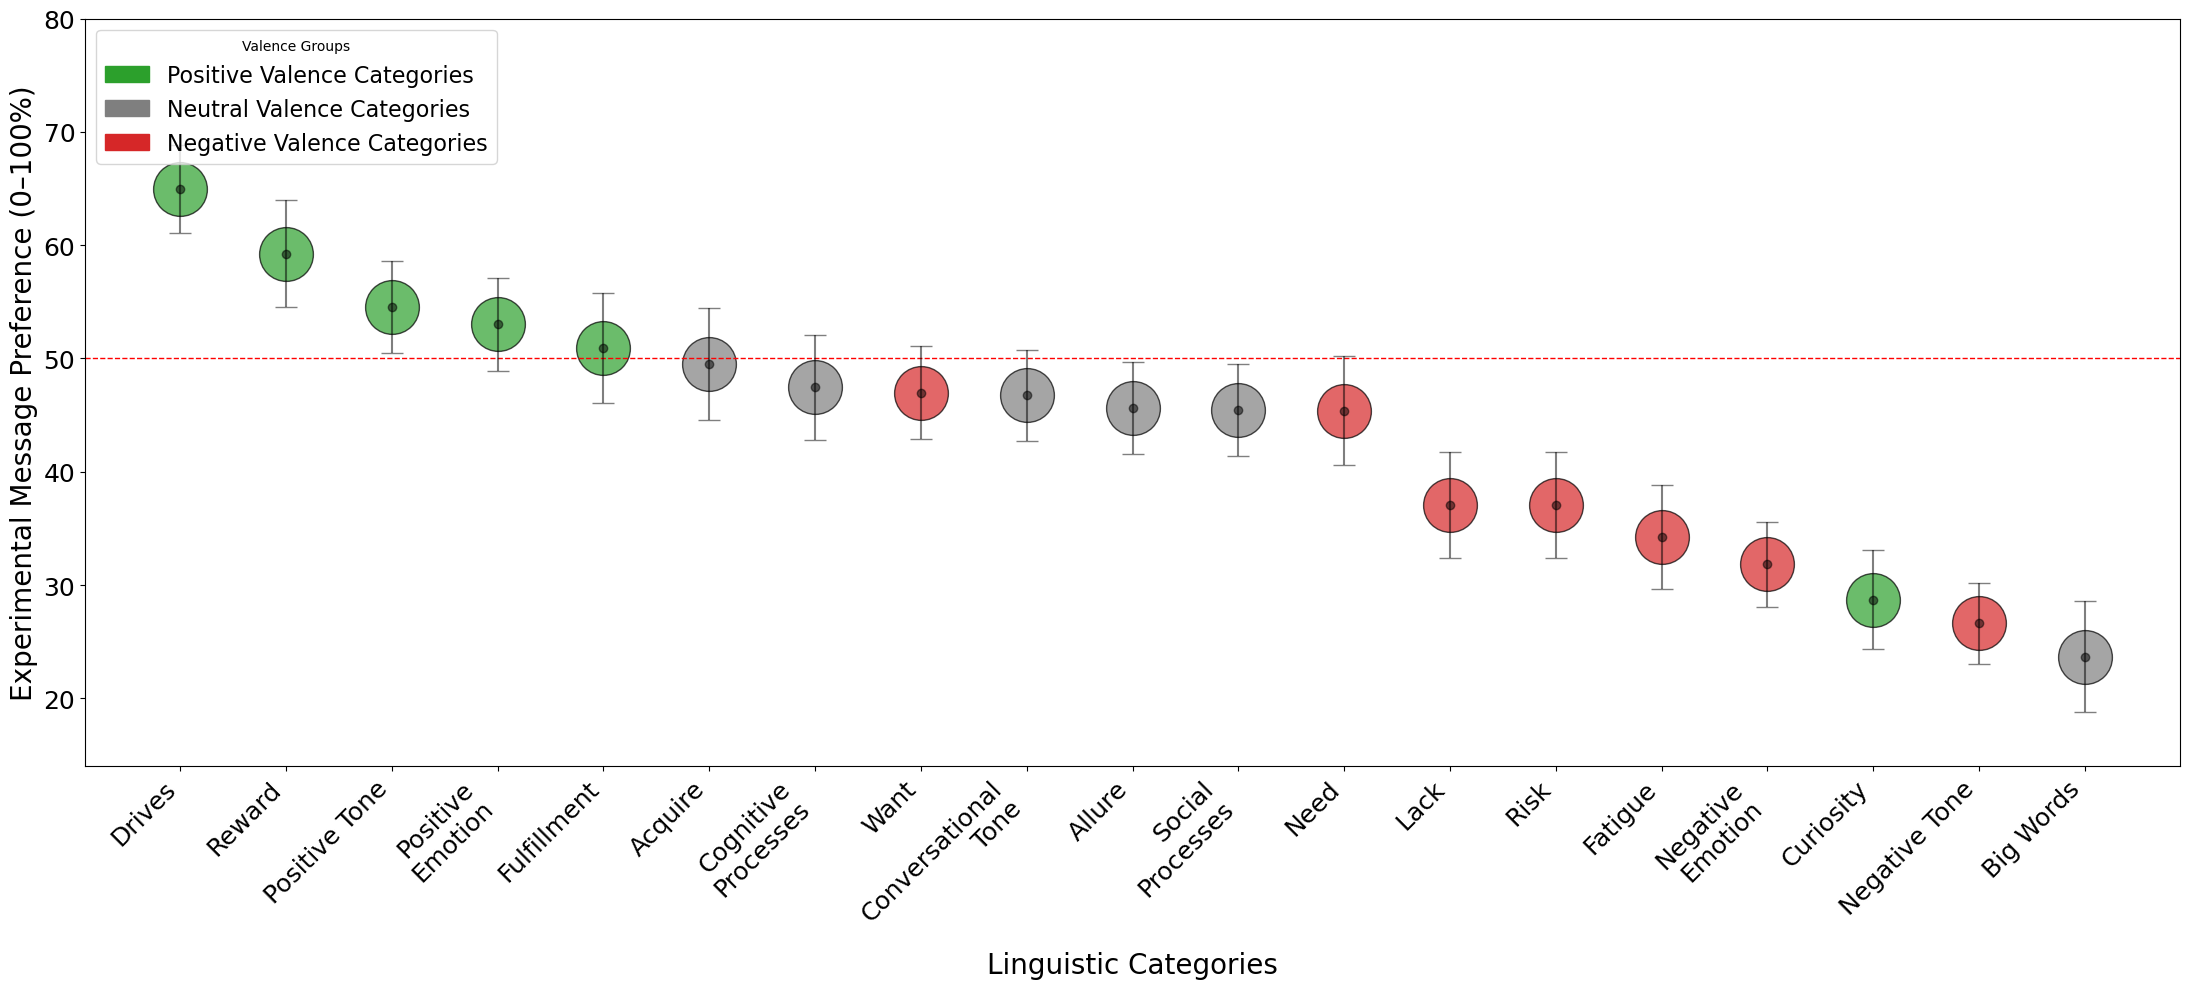

In [29]:
# For the visualization we will aim to plot the average preference per linguistic category independent of linguistic similarity. 
#Also, our data suggest that valence might play a role in message preference. Because of this we aim to plot valence-related differences.

import matplotlib.pyplot as plt
import textwrap
import matplotlib.patches as mpatches

# Define category valence groups
positive_valence = ['Drives', 'Positive Tone', 'Curiosity', 'Positive Emotion', 'Fulfillment', 'Reward']
neutral_valence = ['Big Words', 'Conversational Tone', 'Social Processes', 'Acquire', 'Allure', 'Cognitive Processes']
negative_valence = ['Negative Emotion', 'Fatigue', 'Lack', 'Need','Risk', 'Negative Tone', 'Want']

# Assign color map
color_map = {
    'positive': 'tab:green',
    'neutral': 'tab:gray',
    'negative': 'tab:red'
}

# Add a valence column to your dataframe
def assign_valence(cat):
    if cat in positive_valence:
        return 'positive'
    elif cat in neutral_valence:
        return 'neutral'
    elif cat in negative_valence:
        return 'negative'
    else:
        return 'other'

means_by_group_df['valence'] = means_by_group_df['Message_pref'].apply(assign_valence)

# Sort by Mean descending
means_by_group_df_sorted = means_by_group_df.sort_values(by='Mean', ascending=False)
desired_order = means_by_group_df_sorted['Message_pref'].tolist()

# Map category names to numeric x positions
category_to_x = {cat: i for i, cat in enumerate(desired_order)}

# Create the plot
fig, ax = plt.subplots(figsize=(22, 10))

# Plot each dot
for idx, row in means_by_group_df_sorted.iterrows():
    x = category_to_x[row['Message_pref']]
    y = row['Mean']
    valence = row['valence']
    color = color_map.get(valence, 'gray')
    

    ax.scatter(x, y, s=1500, alpha=0.7, color=color, edgecolors='k')

# Add horizontal baseline
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Add error bars
x_positions = means_by_group_df_sorted["Message_pref"].map(category_to_x)
ax.errorbar(x_positions, means_by_group_df_sorted["Mean"],
            yerr=means_by_group_df_sorted["STD"], fmt='o', color='black',
            alpha=0.5, capsize=8)

# Set x-axis
wrapped_labels = [textwrap.fill(label, width=14) for label in desired_order]
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

# Y-axis and labels
ax.set_ylim(14, 80)
ax.set_ylabel('Experimental Message Preference (0–100%)', fontsize=20)
ax.set_xlabel('Linguistic Categories', fontsize=20)

# Custom valence legend
legend_patches = [
    mpatches.Patch(color=color_map['positive'], label='Positive Valence Categories'),
    mpatches.Patch(color=color_map['neutral'], label='Neutral Valence Categories'),
    mpatches.Patch(color=color_map['negative'], label='Negative Valence Categories')
]
ax.legend(handles=legend_patches, loc='upper left', prop={'size': 16}, title='Valence Groups')

# Save and show
ax.tick_params(axis='x', labelsize=18)  # or any size you prefer
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.savefig("message_preferences_sorted_colored.png", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
plt.savefig("message_preferences_sorted_colored.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>